<a href="https://colab.research.google.com/github/Mgobeaalcoba/padawan_python_course/blob/main/2_Outliers.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Deteccion de outliers

**¿Que es un outlier?** Un outlier, o valor atípico, es un punto de datos que se aleja significativamente de la mayoría de los otros puntos en un conjunto de datos.



In [ ]:
# @title Instalo librerias

## Manejo de data y estadisticos
import pandas as pd
import numpy as np

## Graficación
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
# @title Extract step with a csv file in the web
df = pd.read_csv('https://www.dropbox.com/s/4jgheggd1dak5pw/data_visualization.csv?raw=1', index_col=0)

In [ ]:
# @title View mi dataframe
df.tail(10) # Otra forma de inspeccionar mi data frame pero viendo los 10 últimos

,arrow,under,interior,theta,amb,slice,delta,pi,height,nu,night,dataset,length,twi,x,wind,y,rho,alpha
990,6209.753295,0.732437,4.426818e+10,41055.068928,331.653925,3582.802838,55.429492,440.016305,1.693153e+06,2.899661e+07,7.965695,7809.055062,1.152036,1340.462955,5.663243,9953.017592,-34.704712,1.134884e+19,198.874292
991,8457.226075,1.438344,1.216040e+11,23230.289274,443.118324,1777.726599,-29.349866,4018.815584,4.139348e+05,3.071641e+07,7.610101,2844.445014,2.360252,648.642816,8.179385,13581.721923,-46.076055,1.137942e+21,334.883874
992,2099.916098,-1.207277,7.189627e+11,11704.491903,190.154373,13373.973954,-41.122709,12408.459795,2.318990e+07,2.863196e+07,5.800176,10482.306626,1.990678,26.308591,9.300349,3352.231620,-16.658831,1.595168e+22,11.131294
993,2118.386414,-1.040464,4.427253e+10,17512.064222,450.718353,4321.243118,40.081187,5426.867759,2.422329e+06,8.157749e+06,11.355990,12378.603302,0.208171,1383.804502,9.879021,3386.790709,-19.683888,7.621764e+22,638.224912
994,5944.810011,-0.620545,7.615549e+10,24257.782838,423.250416,12485.110654,-12.308762,13009.815412,2.018961e+07,2.707811e+07,7.660478,12075.722583,-0.441351,253.420318,10.921975,9538.308526,-37.712587,4.783665e+21,575.026914
995,2749.811424,-0.176609,6.983382e+11,14876.319862,359.422059,5360.529437,-15.470713,5558.872651,3.752686e+06,1.456308e+07,7.417568,5807.408570,-1.167784,370.423961,7.110374,4406.283830,-48.266589,9.105152e+22,119.853953
996,10442.170370,0.198591,1.031882e+11,42350.604291,237.297761,1805.076239,-137.095005,7773.621385,4.310311e+05,2.339491e+07,7.703437,10113.582272,-0.202420,1316.081208,10.507030,16778.437643,1.961629,5.699698e+22,8.092722
997,4707.664579,-0.207417,1.782266e+12,16707.938824,39.739406,10515.936575,-123.725702,2405.422466,1.431426e+07,4.491697e+06,8.988166,8506.997588,-0.107590,1421.379842,10.927412,7551.160916,-49.380483,4.089604e+18,435.225825
998,9834.339698,-0.859573,1.528939e+11,29350.577025,106.775051,847.838840,-99.164608,14315.197116,9.967555e+04,3.625620e+07,10.156257,26.337454,-1.998184,1383.605685,12.519678,15793.503610,-1.598941,2.967663e+23,554.982066
999,5472.292507,0.492024,1.006050e+10,22292.142976,420.824873,12143.240154,43.287162,11660.432077,1.903369e+07,2.410389e+07,9.960025,7150.618716,-1.302128,325.470826,10.123276,8778.008571,-22.666388,2.759391e+21,515.378577


In [ ]:
# @title View only my columns names
df.columns

Index(['arrow', 'under', 'interior', 'theta', 'amb', 'slice', 'delta', 'pi',
       'height', 'nu', 'night', 'dataset', 'length', 'twi', 'x', 'wind', 'y',
       'rho', 'alpha'],
      dtype='object')

In [ ]:
# @title Set auxiliaries variables
col = 'length'
out = 'outlier'

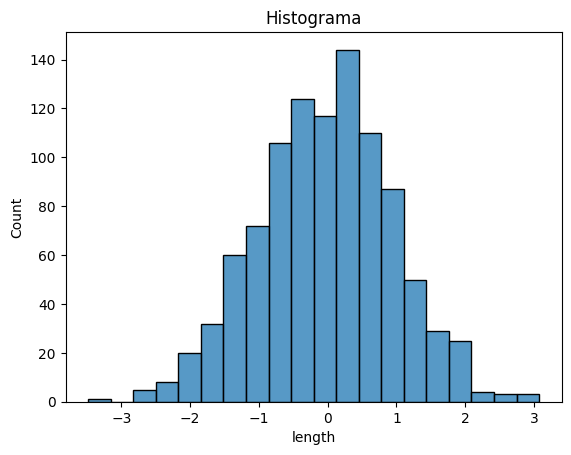

In [ ]:
# @title Histograma
## Histograma de distribucion incluyendo outliers

### Diseño el gráfico usando seaborn
sns.histplot(data=df,
             x=col,
             bins=20)

### Defino el titulo de mi gráfico usando matplotlib
plt.title('Histograma')

### Muestro el gráfico
plt.show()

## Deteccion de outliers a traves del método "Z-score"
El **"z-score" (o puntuación z)** es una medida que cuantifica cuántas desviaciones estándar un valor dado está por encima o por debajo de la media en una distribución normal. Al establecer un umbral en unidades de desviación estándar, como sigma * std, puedes identificar valores que están significativamente alejados de la media y considerarlos como outliers.

El método z-score es ampliamente utilizado para identificar outliers en estadística y análisis de datos, ya que proporciona una forma objetiva y cuantitativa de determinar qué valores se consideran atípicos en una distribución de datos.

Este script utiliza el método de 3 desviaciones estandar (este valor se puede cambiar desde la variable sigma) para detectar outliers en una columna específica de un dataframe.

1. Primero se calcula el promedio y la desviación estandar de los datos de la columna seleccionada.
2. Luego se determina el rango de valores permitidos (límites inferior y superior) y se buscan valores fuera de este rango y se guardan en una lista de outliers.
3. Por ultimo se retorna un dataframe sin los outliers detectados.  

**Es importante mencionar que este metodo solo es util cuando se tiene una distribución normal en los datos.**

In [ ]:
# @title Identificación de outliers usando el "Z-score"

## Defino variables mean, std y sigma
mean = df[col].mean()
std = df[col].std()
sigma = 3

## Encuentro outliers
outliers = (df[col] - mean).abs() > sigma * std

## Dataframe de solo outliers:
df_outliers = df[outliers]

## Elimino outliers o me quedo con mi "typical data"
df_without_outliers = df[~outliers] # con el operador "~" invertimos el valor booleano que tenemos en la serie "outliers" para quedarnos ahora con la data tipica

## Genero columna para etiquetar outliers a la que voy a llamar "outlier". Recordar la segunda variable auxiliar de arriba
df[out] = outliers

In [ ]:
# @title Visualizo mis outliers
df_outliers

,arrow,under,interior,theta,amb,slice,delta,pi,height,nu,night,dataset,length,twi,x,wind,y,rho,alpha,outlier
284,3839.422925,-0.277922,3.002370e+10,16663.265191,473.261173,13538.071794,-74.52332,7524.278812,2.373459e+07,2.142962e+07,12.535780,12813.171290,-3.482741,883.612832,9.609240,6151.517818,-73.115072,1.505921e+22,211.546104,True
820,7900.200968,-0.256530,1.011020e+11,40965.721662,294.362773,13059.453094,-74.92531,6072.225006,2.214581e+07,4.236511e+07,9.444436,7927.573604,3.075253,292.379151,9.251581,12683.185613,2.881954,5.376551e+20,458.257191,True


In [ ]:
# @title Cantidad de outliers
print(sum(outliers))

2


In [ ]:
# @title Visualizo mi Typical Data
df_without_outliers.sample(5)

,arrow,under,interior,theta,amb,slice,delta,pi,height,nu,night,dataset,length,twi,x,wind,y,rho,alpha,outlier
803,445.415714,-0.216614,4.293599e+10,24168.435571,189.115239,11254.376855,80.396036,11440.423925,1.635140e+07,3.987948e+07,12.300947,9046.915392,-1.245918,358.924976,13.365743,691.181777,-26.605332,6.299760e+22,917.518952,False
935,9412.169227,1.183257,1.245777e+09,37391.831004,418.347699,12717.582594,21.642064,13743.175920,2.098643e+07,5.900501e+07,9.402706,5254.322040,0.890177,622.741176,10.957276,15136.880922,8.606104,2.575032e+22,597.479610,False
918,2650.393449,0.373104,3.696532e+11,19969.114049,176.555196,12348.362454,-22.910858,11352.420664,1.974537e+07,2.441359e+07,15.063621,2554.733022,-1.207742,136.359177,8.909153,4233.488386,1.547996,8.352987e+21,56.515111,False
559,4226.188158,-0.758642,7.985161e+10,30065.355156,385.398699,2146.946739,-67.096720,13963.184072,6.027647e+05,1.652052e+07,11.953186,6281.482739,0.634591,689.964727,11.510042,6790.860961,-64.780520,6.101420e+21,88.449716,False
282,10185.069031,-0.132208,3.050426e+11,13938.173564,352.473858,3295.631618,0.942149,14520.538059,1.433317e+06,1.393187e+07,9.307213,3555.556268,2.763758,315.052224,10.223213,16381.008121,-44.866091,3.723755e+21,448.572401,False


## Deteccion de outliers a traves del método IQR
Método de rango intercuartílico (IQR) para detectar outliers:
1. Considerando todos los valores de nuestra columna en el dataframe se calcula el cuartil superior (Q3), el cuartil inferior (Q1) y el rango intercuartílico (IQR) = Q3 - Q1.
2. Luego, se calculan los límites inferior y superior del rango Q1/Q3 -/+ 1.5 * IQR y se identifican los valores que están fuera de ese rango como outliers.
3. Por ultimo podemos hacer dos cosas que nos van a servir a futuro

> *   Crear un tag para identificar outliers en el dataset original
*   Crear un nuevo dataframe sin outliers

**El IQR funciona tanto para distribuciones normales o gaussianas como para las que no lo son**



In [ ]:
# @title Set auxiliaries variables
col = 'rho'
out = 'outlier'

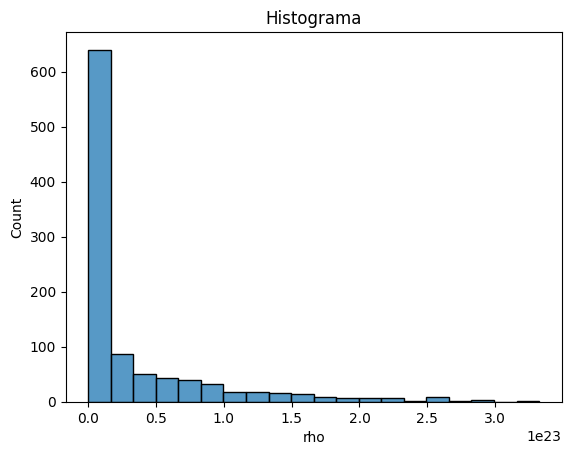

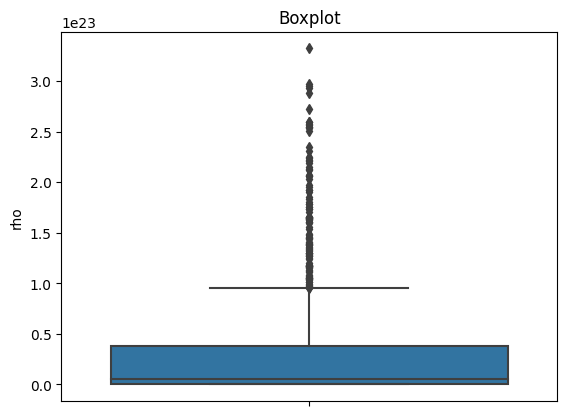

In [ ]:
# @title Histograma y Boxplot

## Histograma de distribucion incluyendo outliers
sns.histplot(data=df, x=col, bins=20)
plt.title('Histograma')
plt.show()

## Armo boxplot para distribucion
sns.boxplot(data=df, y=col)
plt.title('Boxplot')
plt.show()

In [ ]:
# @title Método IQR

## Defino variables para Rango Intercuartílico (IQR)
q1, q3 = np.percentile(df[col], [25, 75])
iqr = q3 - q1
lower_bound = q1 - (iqr * 1.5)
upper_bound = q3 + (iqr * 1.5)

## Encuentro outliers
outliers = ~df[col].between(lower_bound, upper_bound)

## Elimino outliers
df_without_outliers = df[df[col].between(lower_bound, upper_bound)]

## Genero columna para etiquetar outliers
df[out] = outliers

In [ ]:
# @title Cantidad de outliers
print(sum(outliers))

116


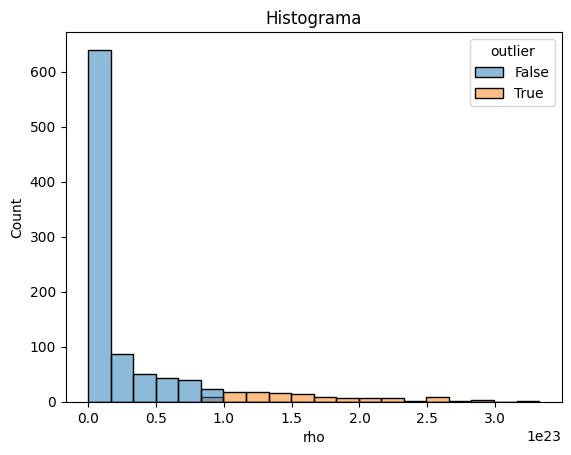

In [ ]:
# @title Histograma que incluye outliers pero distinguidos por color

## Histograma de distribucion incluyendo outliers
sns.histplot(data=df, x=col, bins=20, hue=out)
plt.title('Histograma')
plt.show()

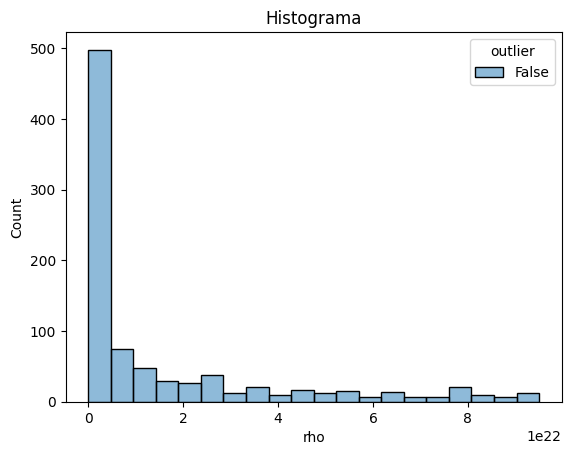

In [ ]:
# @title Histograma sin outliers

## Histograma de distribucion incluyendo outliers
sns.histplot(data=df_without_outliers, x=col, bins=20, hue=out)
plt.title('Histograma')
plt.show()

## Challenges:

1. Grafique el histograma completo de la columna "wind" del DataFrame "df"
2. Identifique los outliers de dicha columna usando el método IQR
3. Vuelva a hacer le histograma pero excluyendo a los outliers del mismo
4. Ahora hagalo incluyendo a los outliers pero con otro color.